# Reuters dataset. Multiclass classification

Since each data point should be classified into only one category, the problem is more specifically an instance of _single-label multiclass classification_.
If each data point could belong to multiple categories (in this case, topics), we'd be facing a _multilabel multiclass classification_ problem.

In [2]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers

In [3]:
# Loading the Reuters dataset

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


As with the IMDB dataset, the argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the data.

In [4]:
# Encoding the integer sequences via multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# vectorize training and test data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use _one-hot encoding_. One-hot encoding is a widely used format for categorical data, also called _categorical encoding_. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

Lets take a look to the test labels to have a glimpse of its structure.

In [5]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [6]:
# vectorize training and test labels

y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Lets look at the new test labels to determine the difference with respect to the originals.

In [7]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, we’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.

In the previous example, we used 16-dimensional intermediate layers, but a
16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

For this reason we’ll use larger layers.

In [8]:
# Model definition

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

We end the model with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.

The last layer uses a softmax activation.

It means the model will output a probability distribution over the 46 different
output classes—for every input sample, the model will produce a 46-dimensional output vector, where `output[i]` is the probability that the sample belongs to class `i`. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It mea-
sures the distance between two probability distributions.

In [9]:
# Compiling the model

model.compile(
    optimizer="rmsprop",
    loss     ="categorical_crossentropy",
    metrics  =["accuracy"]
)

In [10]:
# Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
# Training the model

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3970 - loss: 3.1439 - val_accuracy: 0.5970 - val_loss: 1.7891
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6523 - loss: 1.6209 - val_accuracy: 0.7060 - val_loss: 1.3779
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7366 - loss: 1.2161 - val_accuracy: 0.7420 - val_loss: 1.2191
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7837 - loss: 1.0102 - val_accuracy: 0.7700 - val_loss: 1.0947
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8190 - loss: 0.8321 - val_accuracy: 0.7910 - val_loss: 1.0135
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8574 - loss: 0.6747 - val_accuracy: 0.7870 - val_loss: 0.9923
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8772 - loss: 0.5885 - val_accuracy: 0.8090 - val_loss: 0.9239
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8856 - loss: 0.5189 - val_accuracy: 0.8190 - v

Lets have a look to the training and validation loss and accuracy.

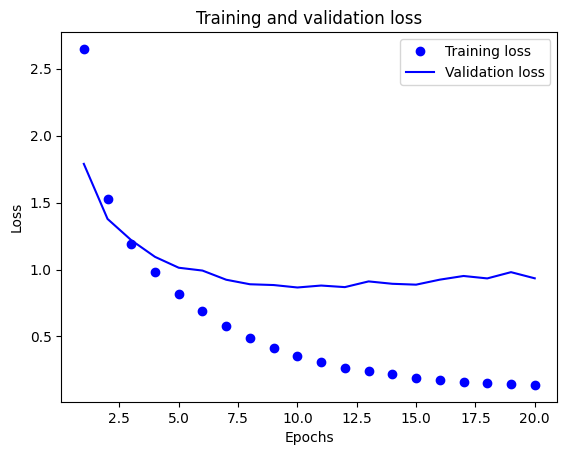

In [12]:
# Plotting the training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

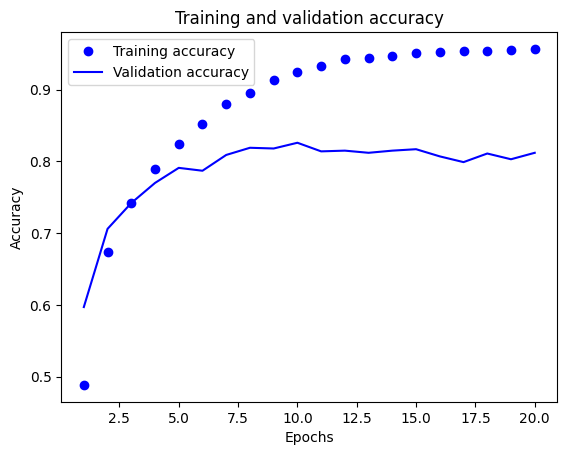

In [13]:
# Plotting the training and validation accuracy

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs.

In [14]:
# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss     ="categorical_crossentropy",
    metrics  =["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3981 - loss: 3.2966
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6715 - loss: 1.6859
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7284 - loss: 1.2106
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7906 - loss: 0.9664
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8364 - loss: 0.7735
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8681 - loss: 0.6258
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8869 - loss: 0.5315
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9092 - loss: 0.4189
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9225 - loss: 0.3686
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8036 - loss: 0.8874


[0.917553186416626, 0.7943009734153748]

In [15]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(46,)
1.0
3


## A different approach for handle labels and loss

Another way to encode the labels would be to cast them as an integer tensor.

In [16]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

The only thing this approach would change is the choice of the loss function, because `categorical_crossentropy` expects the labels to follow a categorical encoding.

With integer labels, you should use `sparse_categorical_
crossentropy`:

In [17]:
model.compile(
    optimizer="rmsprop",
    loss     ="sparse_categorical_crossentropy",
    metrics  =["accuracy"]
)

history_1 = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9269 - loss: 0.3343 - val_accuracy: 0.9400 - val_loss: 0.3162
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9412 - loss: 0.2681 - val_accuracy: 0.9250 - val_loss: 0.3326
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9471 - loss: 0.2431 - val_accuracy: 0.9330 - val_loss: 0.3167
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9519 - loss: 0.2030 - val_accuracy: 0.9270 - val_loss: 0.3299
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9536 - loss: 0.1838 - val_accuracy: 0.9250 - val_loss: 0.3545
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9561 - loss: 0.1718 - val_accuracy: 0.9260 - val_loss: 0.3299
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9541 - loss: 0.1620 - val_accuracy: 0.9220 - val_loss: 0.3407
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9626 - loss: 0.1326 - val_accuracy: 0.9260 - v

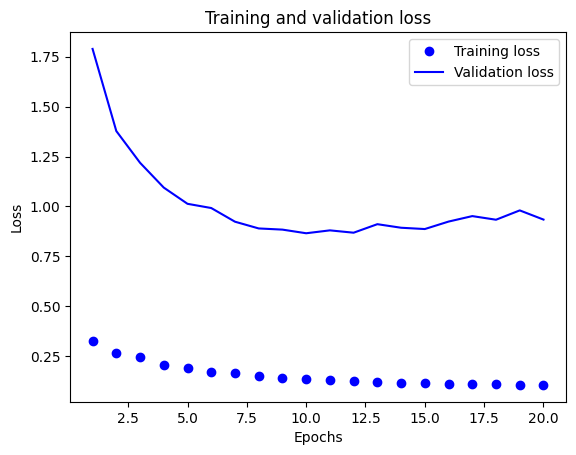

In [18]:
# Plotting the training and validation loss

plt.clf()
loss = history_1.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

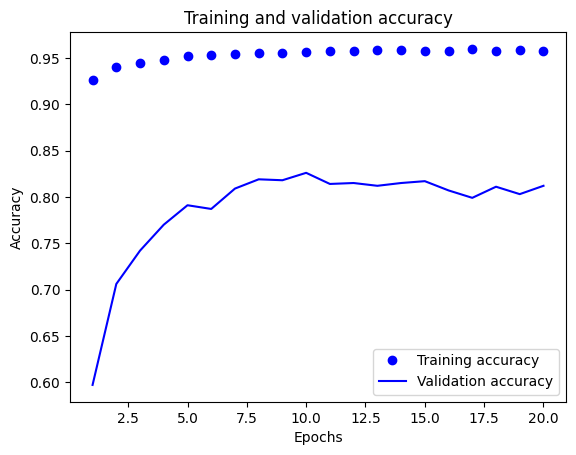

In [19]:
# Plotting the training and validation accuracy

plt.clf()
acc = history_1.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()